In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
df = pd.read_csv("downsampled_signals_and_sampels/xa.s12.00.mhz.1970-12-27HR00_evid00019.csv")

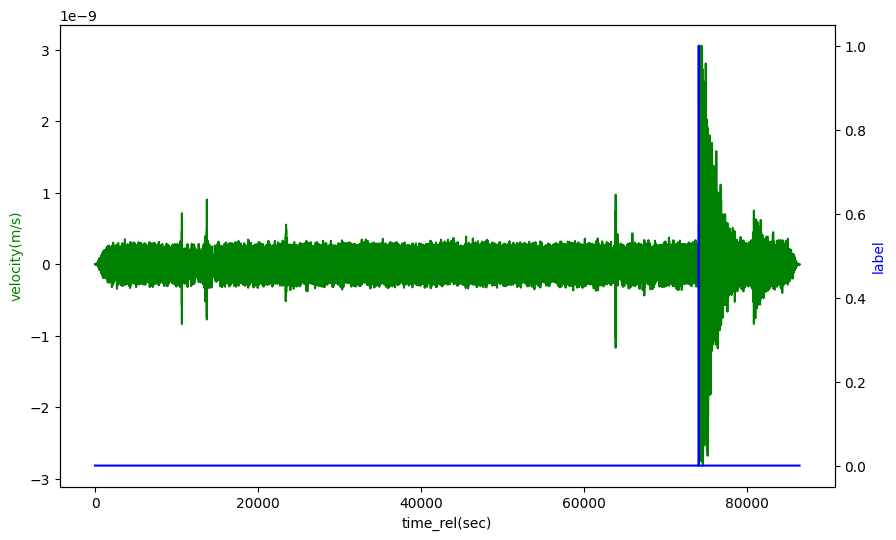

In [55]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot t vs x on the first axis
ax1.plot(df['time_rel(sec)'], df['velocity(m/s)'], 'g-')
ax1.set_xlabel('time_rel(sec)')
ax1.set_ylabel('velocity(m/s)', color='g')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot t vs y on the second axis
ax2.plot(df['time_rel(sec)'], df['label'], 'b-')
ax2.set_ylabel('label', color='b')

# Show the plot
plt.show()

In [56]:
import numpy as np
from scipy.signal import stft

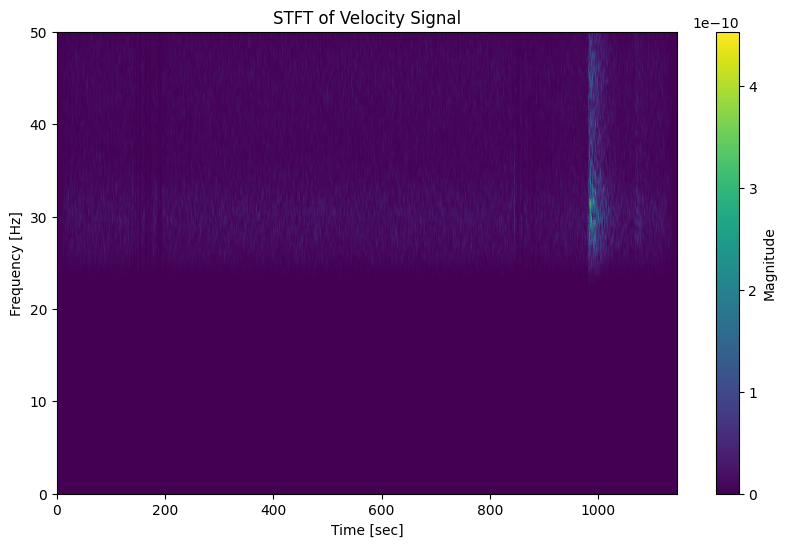

In [57]:
# Compute the Short-Time Fourier Transform (STFT)
f, t, Zxx = stft(df['velocity(m/s)'], fs=100, nperseg=256)

# Plot the STFT result
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT of Velocity Signal')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()


In [24]:
import pywt

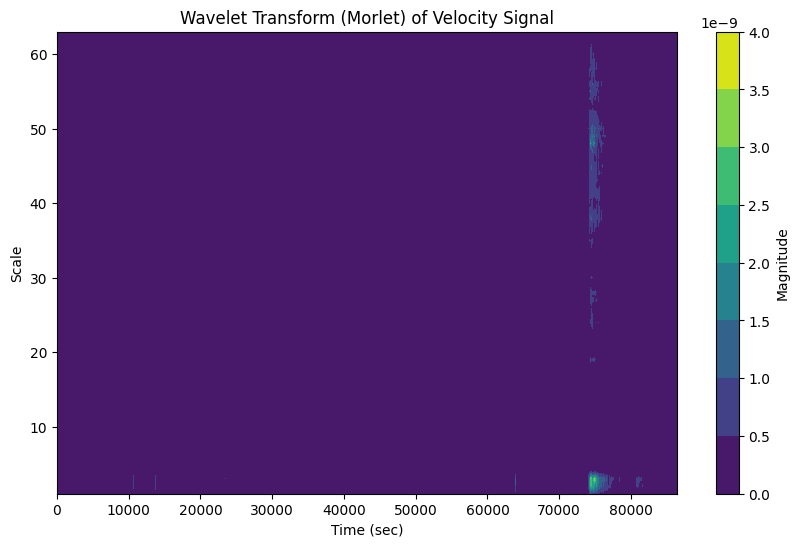

In [70]:
# Perform a Continuous Wavelet Transform (CWT)
scales = np.arange(1, 64)  # Define scale range
coefficients, frequencies = pywt.cwt(df['velocity(m/s)'], scales, 'morl')  # 'morl' is the Morlet wavelet

# Plot the CWT
plt.figure(figsize=(10, 6))
plt.contourf(df['time_rel(sec)'], scales, np.abs(coefficients), cmap='viridis')
plt.title('Wavelet Transform (Morlet) of Velocity Signal')
plt.ylabel('Scale')
plt.xlabel('Time (sec)')
plt.colorbar(label='Magnitude')
plt.show()

In [59]:
from PyEMD import EMD
from scipy.signal import hilbert

In [60]:
# Signal to decompose
signal = df['velocity(m/s)'].values

# Perform Empirical Mode Decomposition (EMD)
emd = EMD()
imfs = emd.emd(signal)

In [61]:
# Hilbert transform on the IMFs to get the instantaneous frequency and amplitude
analytic_signal = hilbert(imfs)

In [62]:
instantaneous_amplitude = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(df['time_rel(sec)']))

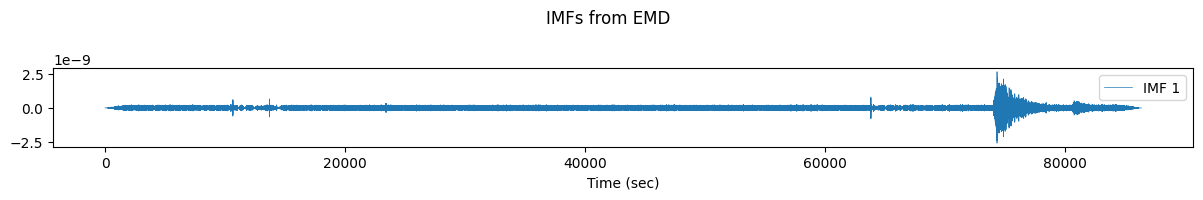

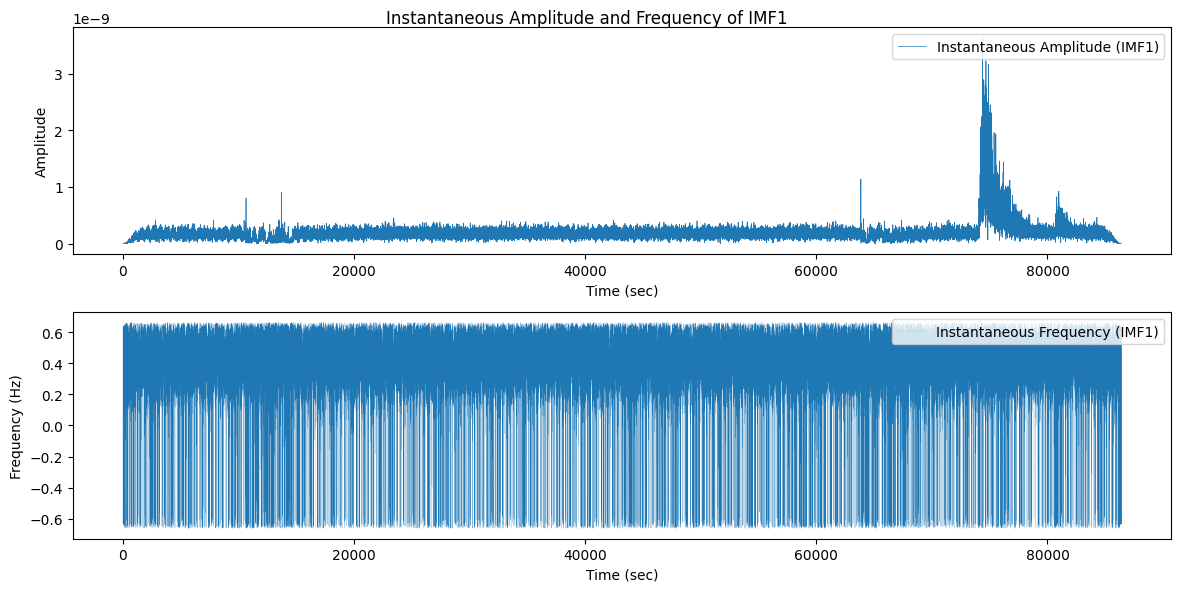

In [67]:

# Plot IMFs
num_imfs = imfs.shape[0]
plt.figure(figsize=(12, 2*num_imfs))
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(df['time_rel(sec)'], imfs[i], label=f'IMF {i+1}', linewidth=0.5)
    plt.legend(loc='upper right')
plt.xlabel('Time (sec)')
plt.suptitle('IMFs from EMD')
plt.tight_layout()
plt.show()

# Plot instantaneous frequency and amplitude of the first IMF
plt.figure(figsize=(12, 6))

# Amplitude
plt.subplot(2, 1, 1)
plt.plot(df['time_rel(sec)'], instantaneous_amplitude[0], label='Instantaneous Amplitude (IMF1)', linewidth=0.5)
plt.legend(loc='upper right')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

# Frequency
plt.subplot(2, 1, 2)
plt.plot(df['time_rel(sec)'][:-1], instantaneous_frequency[0], label='Instantaneous Frequency (IMF1)', linewidth=0.1)
plt.legend(loc='upper right')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.suptitle('Instantaneous Amplitude and Frequency of IMF1')
plt.show()
